In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
z_mag = 50
x_mag = 50
y_mag = 5

num_steps = 54
step_size = int(540/num_steps)

x_steps = np.sin(np.radians(np.arange(0,180,step_size/2)))*x_mag
x_steps2 = np.sin(np.radians(np.arange(180,270,step_size/2)))*x_mag
x_steps = np.hstack([x_steps,x_steps2])

y_steps = np.full((num_steps), y_mag)

z_steps = np.sin(np.radians(np.arange(40,180,int(step_size*.8))))*z_mag
z_steps = np.hstack([z_steps,np.zeros(int((180)*2/step_size))])

print("step_size", step_size)
print("x", x_steps.size)
print("y", y_steps.size)
print("z", z_steps.size)

steps = np.array(([x_steps,y_steps,z_steps]))
steps = steps.reshape(-1,num_steps).transpose(1,0).astype(int)


step_size 10
x 54
y 54
z 54


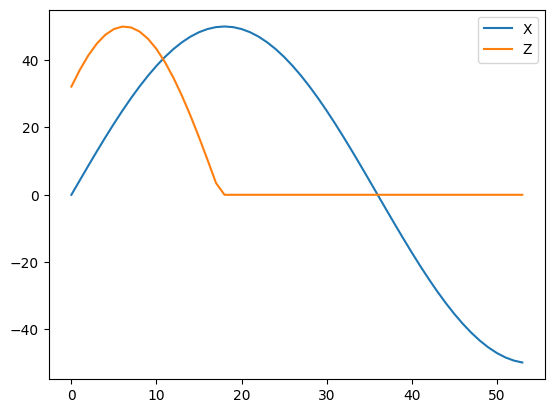

In [3]:
plt.plot(x_steps, label = "X")
plt.plot(z_steps, label = "Z")
plt.legend()
plt.show()

In [4]:
class Trotter:
    def __init__(self, mag=(50, 2, 50), num_steps=54):
        self.num_steps = num_steps
        self.x_mag, self.y_mag, self.z_mag = mag
        self.step_size = int(540 / num_steps)
        self.steps = self._generate_steps()

    def _generate_steps(self):
        x_steps = np.sin(np.radians(np.arange(0, 180, self.step_size / 2))) * self.x_mag
        x_steps2 = np.sin(np.radians(np.arange(180, 270, self.step_size / 2))) * self.x_mag
        x_steps = np.hstack([x_steps, x_steps2])

        y_steps = np.full((self.num_steps), self.y_mag)
        z_steps = np.sin(np.radians(np.arange(40,180,int(step_size*.8))))*self.z_mag
        z_steps = np.hstack([z_steps, np.zeros(int((180) * 2 / self.step_size))])

        steps = np.array(([x_steps, y_steps, z_steps]))
        return steps.reshape(-1, self.num_steps).transpose(1, 0).astype(int)

    def get_step(self, index):
        return self.steps[index]

    def step_generator(self):
        for i in range(self.num_steps):

            i2 = i + int(self.num_steps * 2 / 3)
            if i2 >= self.num_steps:
                i2 = 0

            l1_3 = self.get_step(i)
            l2_4 = self.get_step(i2)

            yield np.array([l1_3, l2_4, l1_3, l2_4])



In [5]:
trotter = Trotter()
for x in trotter.step_generator():
    print(x)

[[ 0  2 32]
 [ 0  2  0]
 [ 0  2 32]
 [ 0  2  0]]
[[ 4  2 37]
 [-4  2  0]
 [ 4  2 37]
 [-4  2  0]]
[[ 8  2 41]
 [-8  2  0]
 [ 8  2 41]
 [-8  2  0]]
[[ 12   2  44]
 [-12   2   0]
 [ 12   2  44]
 [-12   2   0]]
[[ 17   2  47]
 [-17   2   0]
 [ 17   2  47]
 [-17   2   0]]
[[ 21   2  49]
 [-21   2   0]
 [ 21   2  49]
 [-21   2   0]]
[[ 24   2  49]
 [-25   2   0]
 [ 24   2  49]
 [-25   2   0]]
[[ 28   2  49]
 [-28   2   0]
 [ 28   2  49]
 [-28   2   0]]
[[ 32   2  48]
 [-32   2   0]
 [ 32   2  48]
 [-32   2   0]]
[[ 35   2  46]
 [-35   2   0]
 [ 35   2  46]
 [-35   2   0]]
[[ 38   2  43]
 [-38   2   0]
 [ 38   2  43]
 [-38   2   0]]
[[ 40   2  39]
 [-40   2   0]
 [ 40   2  39]
 [-40   2   0]]
[[ 43   2  34]
 [-43   2   0]
 [ 43   2  34]
 [-43   2   0]]
[[ 45   2  29]
 [-45   2   0]
 [ 45   2  29]
 [-45   2   0]]
[[ 46   2  23]
 [-46   2   0]
 [ 46   2  23]
 [-46   2   0]]
[[ 48   2  17]
 [-48   2   0]
 [ 48   2  17]
 [-48   2   0]]
[[ 49   2  10]
 [-49   2   0]
 [ 49   2  10]
 [-49   2   0]]